In [1]:
import sys
sys.path.append('../')

import pickle as pkl
from src.utils import load_file


The following scripts must have been executed prior to this notebook:

- get_graph_data.py to retrieve the graphs, boundaries, and GDMs
- get_node_linkage.py to obtain the linkage matrix of the desired clustering method

# Node Clustering based on the Graphlet Degree Vector

In this notebook I implement node clustering for street networks based on their graphlet degree vectors. The approach mirrors the approach proposed by Milenkovic and Przulj (https://www3.nd.edu/~tmilenko/papers/CI_08_GDD_sign.pdf). We will need to:

(i) Compute the graphlet degree vector of each node

(ii) Compute a distance matrix between all nodes based on the distance function D_GDV, to be defined

(iii) Cluster this metric space using (say) hierarchical clustering with single linkage

Steps (ii) and (iii) can be done in two different settings: either we consider each city as a disjoint metric space and cluster the nodes within that city only, or we group all the nodes of all cities and cluster them together. We will consider the approach of a single city due to space constraints

## 1. Loading Graph Data

In [2]:
graphs_dict = load_file('../data/d2_processed/graphs_dict.pickle')
node_gdfs_dict = load_file('../data/d2_processed/node_gdfs_dict.pickle')
GDMs_dict = load_file('../data/d2_processed/GDMs_dict.pickle')

## 2. Clustering

In [ ]:
linkage_dict = load_file('../data/d3_results/linkage_dict.pickle')

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
        
dend = shc.dendrogram(linkage, color_threshold=0.125,
                      truncate_mode='level', p=7,
                      ax=ax)

plt.show()

In [ ]:
flat_cluster_arr = shc.fcluster(linkage, t=7, criterion='maxclust')
nodes_gdf['cluster-7'] = flat_cluster_arr

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))

ax = ox.plot_graph(G, ax=ax, node_size=1, edge_alpha=0.5, show=False)[1]
ax = nodes_gdf.plot(ax=ax, column='cluster-7', alpha=0.5, markersize=150)
ax.set_title("New York City", fontsize=50)

plt.show()

### iiib. Paris

In [ ]:
Gp, GDMp = graphs_dict[('Paris', 'France')], GDMs_dict[('Paris', 'France')]
nodes_gdfp = ox.graph_to_gdfs(Gp, edges=False)

D_matrixp = get_D_matrix(GDMp)
filepathp = '../data/test-run/Dmatrixp.pickle'
with open(filepathp, 'wb') as file:
    pkl.dump(D_matrixp, file)
    
linkagep = shc.linkage(D_matrixp, method='single')
filepathp_link = '../data/test-run/linkagep.pickle'
with open(filepathp_link, 'wb') as file:
    pkl.dump(linkagep, file)

In [ ]:
flat_cluster_arrp = shc.fcluster(linkagep, t=7, criterion='maxclust')
nodes_gdfp['cluster-7'] = flat_cluster_arrp

fig, ax = plt.subplots(figsize=(20,15))        
dend = shc.dendrogram(linkagep, color_threshold=0.125,
                      truncate_mode='level', p=7,
                      ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))

ax = ox.plot_graph(Gp, ax=ax, node_size=1, edge_alpha=0.5, show=False)[1]
ax = nodes_gdfp.plot(ax=ax, column='cluster-7', alpha=0.5, markersize=150)
ax.set_title("Paris", fontsize=50)

plt.show()

In [2]:
from src import node_clustering as nc

In [3]:
from src.get_graph import simplify_graph
G = dict()
G[('UWS', 'US')]= simplify_graph(ox.graph_from_place("Upper West Side, Manhattan", network_type='drive'))

In [4]:
from src.get_GDM import get_GDMs
GDM_dict, nodes_gdf_dict = get_GDMs(G, save=False, get_nodes_gdf=True)
GDM, nodes_gdf = GDM_dict[('UWS', 'US')], nodes_gdf_dict[('UWS', 'US')]

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  6.23it/s]


In [7]:
D = nc.get_D_matrix(GDM)

In [13]:
from scipy.spatial.distance import squareform
linkage = shc.linkage(squareform(D), method='single')

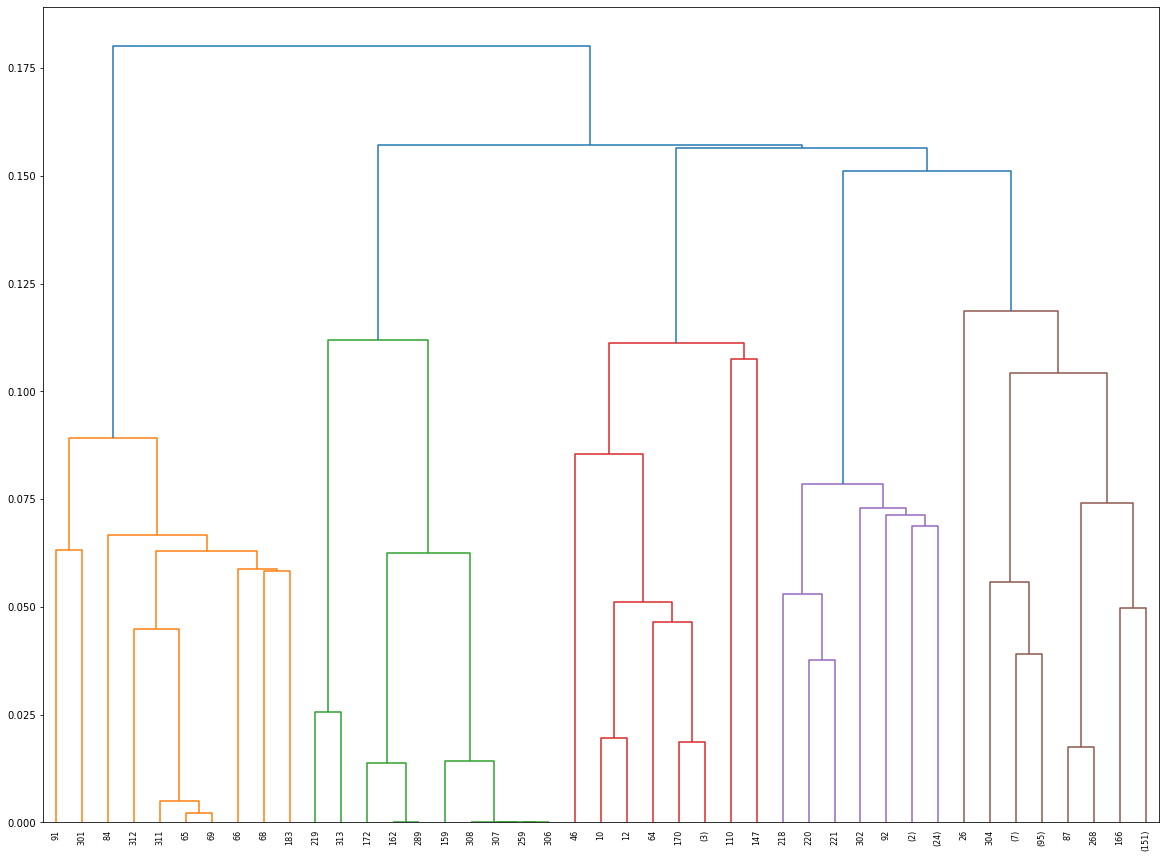

In [15]:
fig, ax = plt.subplots(figsize=(20,15))
        
dend = shc.dendrogram(linkage, color_threshold=0.125,
                      truncate_mode='level', p=7,
                      ax=ax)

plt.show()

In [16]:
flat_cluster_arr = shc.fcluster(linkage, t=7, criterion='maxclust')
nodes_gdf['cluster-7'] = flat_cluster_arr

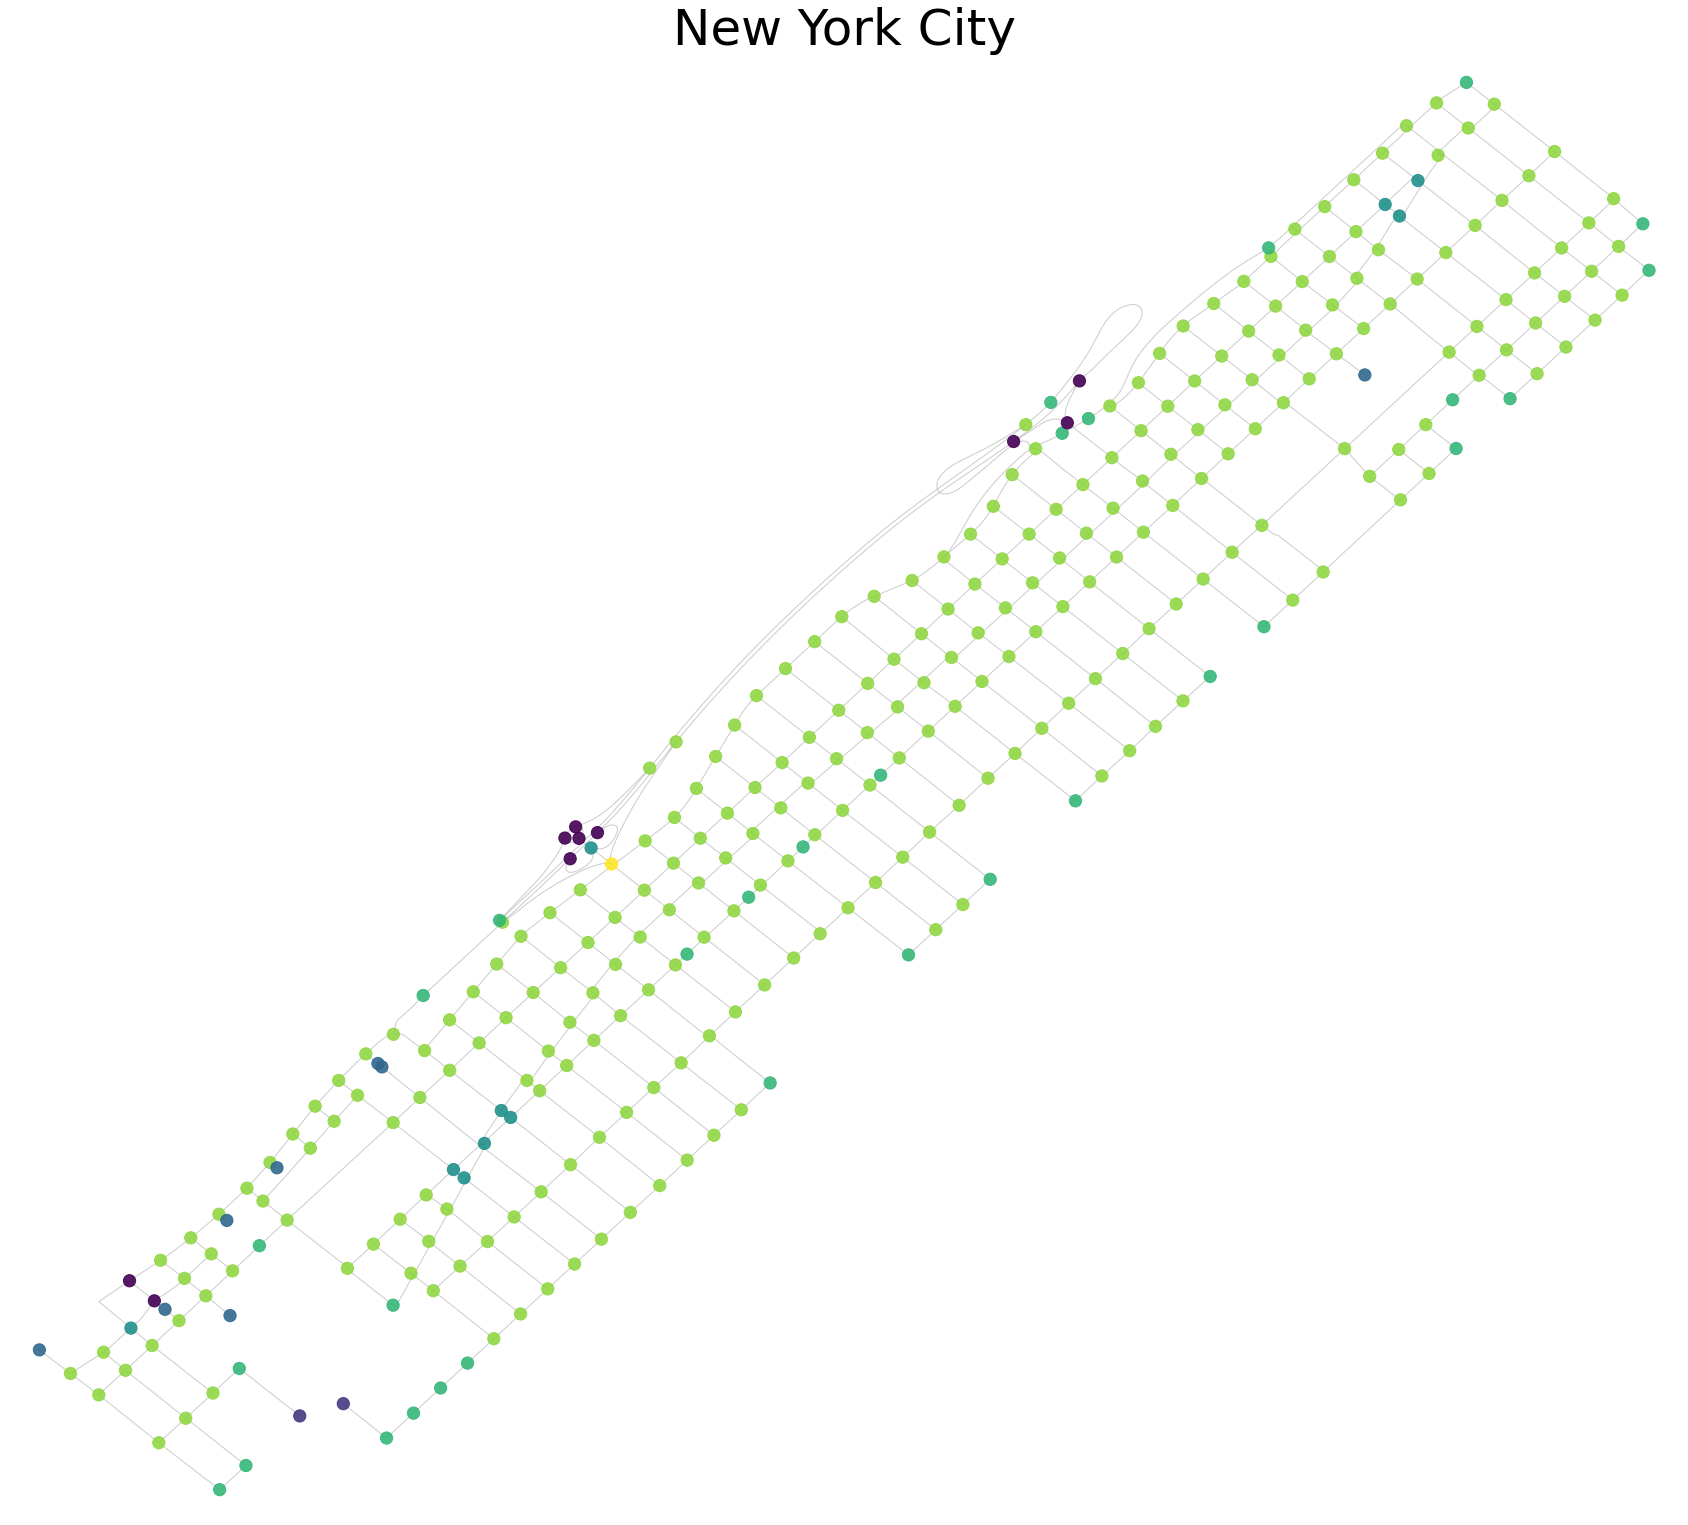

In [32]:
fig, ax = plt.subplots(figsize=(30, 30))

graph = ox.project_graph(G[('UWS', 'US')], to_crs=nodes_gdf.crs)

ox.plot_graph(graph, ax=ax, node_size=0, edge_alpha=0.5, show=False, close=False)
nodes_gdf.plot(ax=ax, column='cluster-7', alpha=0.9, markersize=150, zorder=30)
ax.set_title("New York City", fontsize=50)

plt.show()